In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

OPIS SKUPA PODATAKA

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [2]:
df = pd.read_csv('podaci\online+shoppers+purchasing+intention+dataset\online_shoppers_intention.csv', encoding='cp1252', sep=',')
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_137728\1823023124.py:1: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv('podaci\online+shoppers+purchasing+intention+dataset\online_shoppers_intention.csv', encoding='cp1252', sep=',')


In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
#transformacija
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)


X = df.drop("Revenue", axis=1)
y = df["Revenue"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123, stratify=y)

In [6]:
#modeli
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=123),
    "SVM": SVC(probability=True, random_state=123),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=123)
}


Logistic Regression
Confusion Matrix:
[[2034   50]
 [ 229  153]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2084
           1       0.75      0.40      0.52       382

    accuracy                           0.89      2466
   macro avg       0.83      0.69      0.73      2466
weighted avg       0.88      0.89      0.87      2466

ROC AUC: 0.8804541708956799

Random Forest
Confusion Matrix:
[[2015   69]
 [ 156  226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2084
           1       0.77      0.59      0.67       382

    accuracy                           0.91      2466
   macro avg       0.85      0.78      0.81      2466
weighted avg       0.90      0.91      0.90      2466

ROC AUC: 0.9213661052546955

SVM
Confusion Matrix:
[[2021   63]
 [ 193  189]]

Classification Report:
              precision    recall  f1-scor

c:\Users\Korisnik\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:37:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


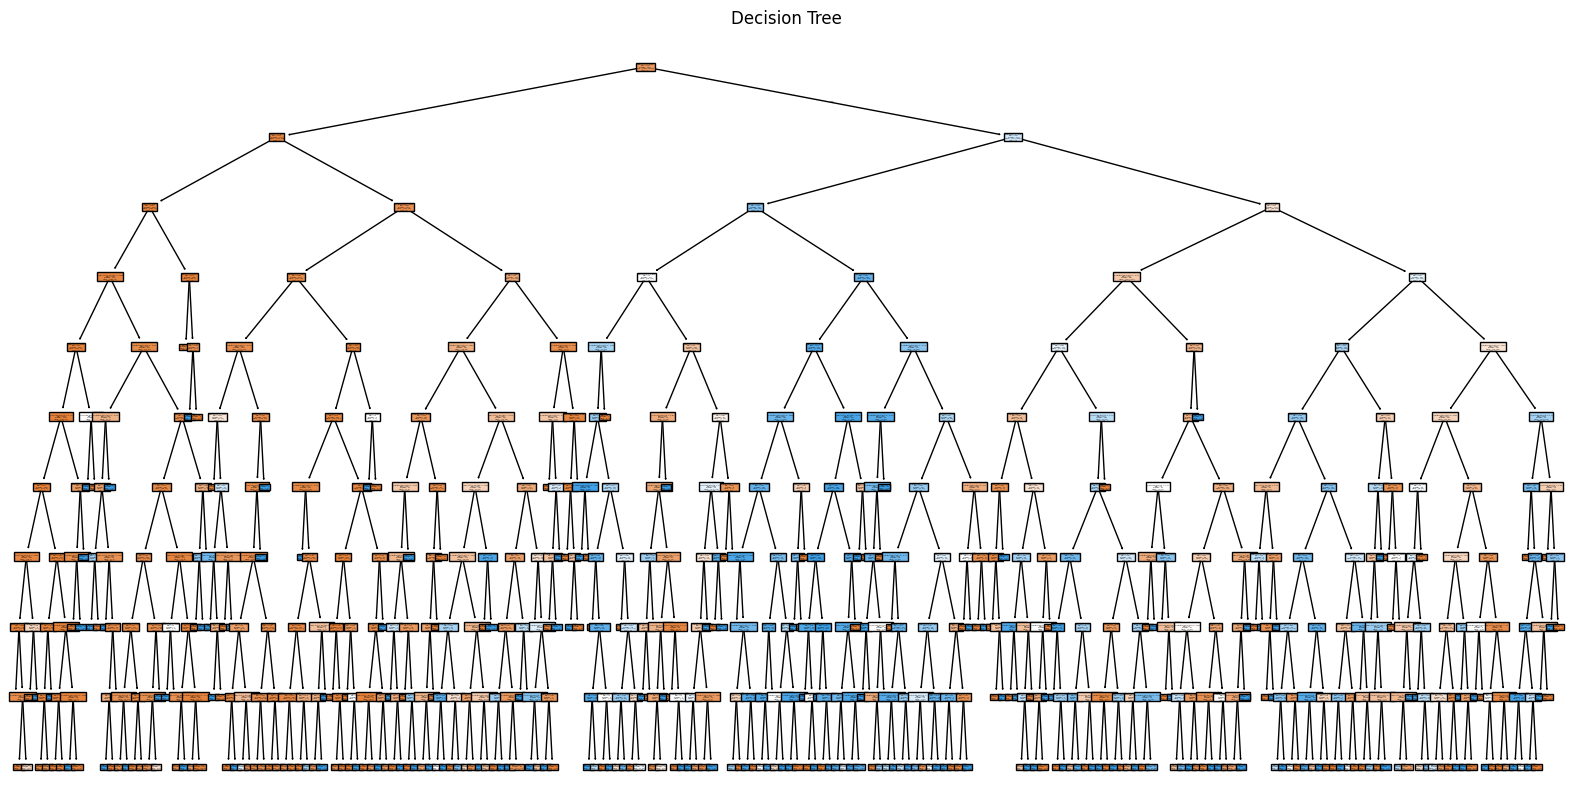

In [7]:
#trening i rez
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"\n{name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print("\nClassification Report:")
    print(classification_report(y_test, preds))
    if proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, proba))
plt.figure(figsize=(20,10))
plot_tree(models['Decision Tree'], feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()